__#1: MNIST MLP Tutorial__

In [1]:
'''Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
import pickle
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [54]:
batches = [1,2,3,4,5]
b = []
for i in batches:
    b.append(unpickle('../data/cifar/data_batch_'+str(i)))

In [84]:
from collections import Counter
Counter(b[3][b'labels'])

Counter({0: 1003,
         6: 1004,
         2: 1041,
         7: 981,
         1: 963,
         4: 1004,
         5: 1021,
         3: 976,
         8: 1024,
         9: 983})

__Visualizing Data__

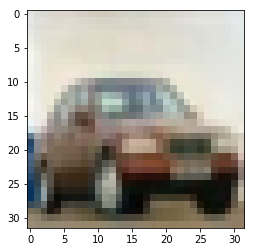

In [85]:
img = b[0][b'data'][644].reshape(3,32,32).transpose([1, 2, 0])
plt.imshow(img)

In [89]:
from sklearn.model_selection import train_test_split

In [186]:
labels = b[0][b'labels']
data = b[0][b'data']

In [172]:
(x_train, y_train) = data[0:9000],labels[0:9000]
(x_test, y_test) = data[9000:],labels[9000:]

In [188]:
batch_size = 256
num_classes = 10
epochs = 30

In [174]:
x_train = x_train.reshape(9000, 3072)
x_test = x_test.reshape(1000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

9000 train samples
1000 test samples


In [203]:
x_train[0]

array([0.23137255, 0.16862746, 0.19607843, ..., 0.54901963, 0.32941177,
       0.28235295], dtype=float32)

In [175]:
# convert class vectors to binary class matrices (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [198]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu'),input_shape=(512,))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

In [199]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [200]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 9000 samples, validate on 1000 samples
Epoch 1/30
9000/9000 [==============================] - 2s 185us/step - loss: 4.7056 - acc: 0.1357 - val_loss: 2.2294 - val_acc: 0.1260
Epoch 2/30
9000/9000 [==============================] - 1s 155us/step - loss: 2.1426 - acc: 0.2098 - val_loss: 2.1410 - val_acc: 0.2050
Epoch 3/30
9000/9000 [==============================] - 1s 157us/step - loss: 2.0718 - acc: 0.2418 - val_loss: 2.2814 - val_acc: 0.1830
Epoch 4/30
9000/9000 [==============================] - 1s 158us/step - loss: 1.9977 - acc: 0.2721 - val_loss: 1.9245 - val_acc: 0.2820
Epoch 5/30
9000/9000 [==============================] - 1s 164us/step - loss: 1.9416 - acc: 0.2958 - val_loss: 2.0059 - val_acc: 0.2310
Epoch 6/30
9000/9000 [==============================] - 1s 157us/step - loss: 1.9156 - acc: 0.2982 - val_loss: 2.2154 - val_acc: 0.2000
Epoch 7/30
9000/9000 [==============================] - 1s 156us/step - loss: 1.8847 - acc: 0.3231 - val_loss: 1.9374 - val_acc: 0.2680


In [201]:
score

[1.8273279800415039, 0.356]

In [202]:
dir(model)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_inbound_node',
 '_built',
 '_check_num_samples',
 '_check_trainable_weights_consistency',
 '_container_nodes',
 '_feed_input_names',
 '_feed_inputs',
 '_fit_loop',
 '_flattened_layers',
 '_gather_list_attr',
 '_get_node_attribute_at_index',
 '_inbound_nodes',
 '_initial_weights',
 '_make_predict_function',
 '_make_test_function',
 '_make_train_function',
 '_node_key',
 '_nodes_by_depth',
 '_outbound_nodes',
 '_output_mask_cache',
 '_output_shape_cache',
 '_output_tensor_cache',
 '_predict_loop',
 '_standardize_user_data',
 '_test_loop',
 '_trainable',
 '_updated_config',
 'add',
 'add_loss',
 'add_updat